In [1]:
import sys
#sys.path.append('/home/t/tingli/tingli/pythoncode/')

import sqlutilpy
import dustmaps.sfd
#SFD=dustmaps.sfd.SFDQuery()
import matplotlib.pyplot as plt
import pandas as pd
#import sphdist
#import sphere_rotate
import numpy as np
import matplotlib.pyplot as plt
#import code_astro
#from start_plot import *
plt.rcParams['figure.figsize']=[5,5]
def betw(x,x1,x2): return (x>x1)&(x<x2)
#from idlplot import tvhist2d
from astropy import table
from astropy import coordinates
from astropy.coordinates import SkyCoord

def betw(x,x1,x2): return (x>x1)&(x<x2)

Configuration file not found:

    /Users/Jenny/.dustmapsrc

To create a new configuration file in the default location, run the following python code:

    from dustmaps.config import config
    config.reset()

Note that this will delete your configuration! For example, if you have specified a data directory, then dustmaps will forget about its location.


# Data Loading

In [41]:
#loading isochrone data (isochrone from dartmouth with a 12.5 Gyr and Y=0.2478  Z=1.7242E-03 Fe/H=-1.0 a/Fe=0.0)

df2 = pd.read_csv('/Users/Jenny/Downloads/z_0.001_age12_fe1.0.csv')


In [42]:
#loading legacy data
dflegacy = pd.read_csv('/Users/Jenny/projects/desi_pal5/pal_fiberassign/for_jiani_cone_2.csv')


In [43]:
#distance module
dm1= (5*np.log10(20.6*1000)-5)


In [44]:
dflegacy.columns


Index(['ls_id', 'dec', 'ra', 'elat', 'elon', 'glat', 'glon', 'mjd_max',
       'mjd_min', 'ref_id', 'wisemask_w1', 'wisemask_w2', 'brickname',
       'ref_cat', 'type', 'wise_coadd_id', 'ebv', 'mag_g', 'mag_r', 'mag_z',
       'flux_ivar_g', 'flux_g', 'flux_ivar_r', 'flux_r', 'flux_ivar_z',
       'flux_z', 'rchisq_g', 'rchisq_r', 'rchisq_z'],
      dtype='object')

In [45]:
#correcting the extinction for the g,r,z mag
ra0,dec0=229.022083, -0.11138
ra1,dec1=229.6, 1 #field center
dflegacy['gmag0'] = dflegacy['mag_g'] - dflegacy['ebv'] * 3.186
dflegacy['rmag0'] = dflegacy['mag_r'] - dflegacy['ebv'] * 2.140
dflegacy['zmag0'] = dflegacy['mag_z'] - dflegacy['ebv'] * 1.196

listcoord = SkyCoord(ra=dflegacy['ra'], dec=dflegacy['dec'], unit='deg')
listref = SkyCoord(ra0,dec0, unit='deg')
listref2 = SkyCoord(ra1,dec1, unit='deg')
dflegacy['dist1'] = listcoord.separation(listref)
dflegacy['dist2'] = listcoord.separation(listref2)

#dm2 = code_astro.d2dm(7.48)
#ra2,dec2 = 229.638, 2.081
#testdata['dist2'] = sphdist.sphdist(testdata['ra'],testdata['dec'],ra2,dec2)



# Error of the data

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'log10(rmagerr)')

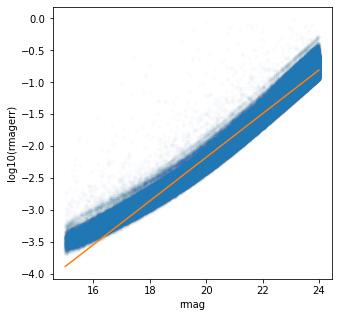

In [46]:
#generating the error of the data (mag r)
leerrg= (1/np.sqrt(dflegacy['flux_ivar_g'][dflegacy['type']=='PSF']))/dflegacy['flux_g'][dflegacy['type']=='PSF']*1.0857 
leerrr= (1/np.sqrt(dflegacy['flux_ivar_r'][dflegacy['type']=='PSF']))/dflegacy['flux_r'][dflegacy['type']=='PSF']*1.0857 
xdata = dflegacy['mag_r']
ydata = np.log10(leerrr)
xnew = xdata[betw(xdata, 15,24)&betw(ydata,-4,0)]
ynew = ydata[betw(xdata, 15,24)&betw(ydata,-4,0)]

plt.plot(xnew, ynew,'.',alpha=0.01)

def log10_error_func(x, a, b):
    return a * x + b

from scipy.optimize import curve_fit
popt, pcov = curve_fit(log10_error_func, xnew, ynew)

xdata = np.linspace(15,24,100)
plt.plot(xdata, log10_error_func(xdata, *popt))
plt.xlabel('rmag')
plt.ylabel('log10(rmagerr)')

In [47]:
popt


array([ 0.3419256, -9.0141012])

931172


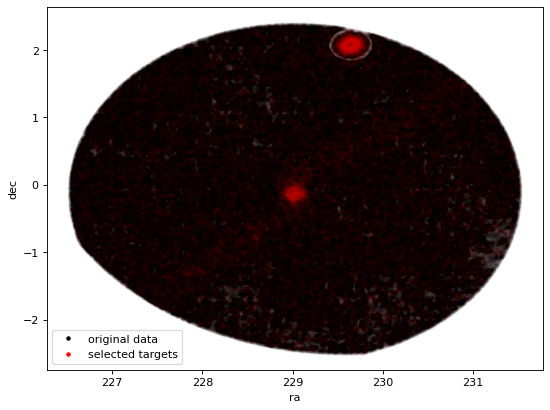

In [52]:
#adding mag limit and plotting the ra dec for the sample
from matplotlib.collections import PathCollection
from matplotlib.legend_handler import HandlerPathCollection, HandlerLine2D
def update(handle, orig):
    handle.update_from(orig)
    handle.set_alpha(1)
plt.figure(figsize=(8, 6), dpi=80)
ind= ( (dflegacy['dist1']<2.5)&  (dflegacy['type'] == 'PSF') )
print (len(dflegacy['ra'][ind]))
line,=plt.plot(dflegacy['ra'][ind],dflegacy['dec'][ind],'.',alpha=0.01,c='k',label='original data')
line2,=plt.plot(dflegacy['ra'][ind&colorrange],dflegacy['dec'][ind&colorrange],'.',c='r',alpha=0.02,label='selected targets')

plt.ylabel('dec')
plt.xlabel('ra')
plt.legend(handler_map={PathCollection : HandlerPathCollection(update_func= update),
                        plt.Line2D : HandlerLine2D(update_func = update)})




/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'log10(gmagerr)')

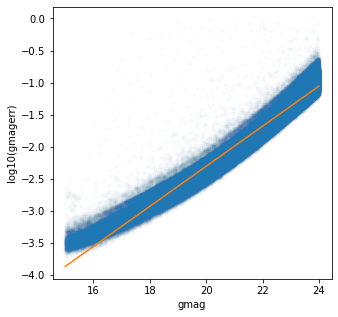

In [53]:
#generating the error of the data (mag g)
#leerrg= (1/np.sqrt(dflegacy['flux_ivar_g']))/dflegacy['flux_g']*1.0857 
#leerrr= (1/np.sqrt(dflegacy['flux_ivar_r']))/dflegacy['flux_r']*1.0857 
xdata2 = dflegacy['mag_g']
ydata2 = np.log10(leerrg)
xnew2 = xdata2[betw(xdata2, 15,24)&betw(ydata2,-4,0)]
ynew2 = ydata2[betw(xdata2, 15,24)&betw(ydata2,-4,0)]
dm1= (5*np.log10(23*1000)-5)
plt.plot(xnew2, ynew2,'.',alpha=0.01)

def log10_error_func(x, a, b):
    return a * x + b

from scipy.optimize import curve_fit
popt2, pcov2 = curve_fit(log10_error_func, xnew2, ynew2)

xdata2 = np.linspace(15,24,100)
plt.plot(xdata2, log10_error_func(xdata2, *popt2))
plt.xlabel('gmag')
plt.ylabel('log10(gmagerr)')



In [49]:
popt2


array([ 0.31272588, -8.5610939 ])

In [50]:
#The error of the g-r color 

grw = 2.*np.sqrt((10**log10_error_func(df2['DECam_r']+dm1, *popt))**2 + (10**log10_error_func(df2['DECam_g']+dm1, *popt2))**2)




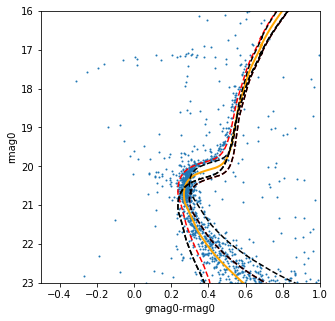

In [51]:
#plotting the isochrone with 1-sigma error 
plt.plot(df2['DECam_g']-df2['DECam_r'], df2['DECam_r']+dm1,lw=2,color='orange')
ind= (dflegacy['dist1']<0.1)&  (dflegacy['type'] == 'PSF')
plt.scatter(dflegacy['gmag0'][ind]-dflegacy['rmag0'][ind],dflegacy['rmag0'][ind],s=1)
plt.plot(df2['DECam_g']-df2['DECam_r']-grw, df2['DECam_r']+dm1-0.2,'--r')
plt.plot(df2['DECam_g']-df2['DECam_r']+grw, df2['DECam_r']+dm1+0.2,'--r')
plt.plot(df2['DECam_g']-df2['DECam_r']+grw, df2['DECam_r']+dm1-0.2,'--k')
plt.plot(df2['DECam_g']-df2['DECam_r']-grw, df2['DECam_r']+dm1+0.2,'--k')
plt.plot(df2['DECam_g']-df2['DECam_r']+grw, df2['DECam_r']+dm1+0.2,'--k')
plt.plot(df2['DECam_g']-df2['DECam_r']-grw, df2['DECam_r']+dm1+0.2,'--k')
plt.ylabel('rmag0')
plt.xlabel('gmag0-rmag0') 



plt.ylim(23, 16)
plt.xlim(-0.5,1)
plt.show()


# Selecting sample

In [11]:
#cut for the giant branch
dm_m92_harris = 14.59
m92ebv = 0.023
m92ag = m92ebv * 3.184
m92ar = m92ebv * 2.130
m92_hb_r = np.array([17.3, 15.8, 15.38, 15.1, 15.05, 15.05])
m92_hb_col = np.array([-0.39, -0.3, -0.2, -0.0, 0.1,0.2])
m92_hb_g = m92_hb_r + m92_hb_col
des_m92_hb_g = m92_hb_g - 0.104 * (m92_hb_g - m92_hb_r) + 0.01
des_m92_hb_r = m92_hb_r - 0.102 * (m92_hb_g - m92_hb_r) + 0.02
des_m92_hb_g = des_m92_hb_g - m92ag - dm_m92_harris
des_m92_hb_r = des_m92_hb_r - m92ar - dm_m92_harris


In [14]:
# making actual selections/cuts - CMD cut and color-color cut

# CMD cut for RGB
def cmd_selection(t, dm, dotter_g, dotter_r, gw=0.2):
    grw = 2.*np.sqrt((10**log10_error_func(df2['DECam_r']+dm1, *popt))**2 + (10**log10_error_func(df2['DECam_g']+dm1, *popt2))**2)



    gw = gw # RGB width in g
    rmin = 16
    rmax = 23
    grmin = -0.4
    grmax = 1.0
    magrange = (t['mag_r'] > rmin) & (t['mag_r'] < rmax) & (t['gmag0'] - t['rmag0'] < grmax) & (t['gmag0'] - t['rmag0'] > grmin)
    gr = t['gmag0'] - t['rmag0']
    grmean =np.interp(t['rmag0'], dotter_r[::-1] + dm, dotter_g[::-1] - dotter_r[::-1], left=np.nan, right=np.nan)
    grmax1 = np.interp(t['rmag0'], dotter_r[::-1] + dm, dotter_g[::-1] - dotter_r[::-1]+grw[::-1], left=np.nan, right=np.nan)
    grmax2 = np.interp(t['rmag0'], dotter_r[::-1] + dm + gw, dotter_g[::-1] - dotter_r[::-1]+grw[::-1], left=np.nan, right=np.nan)
    grmax3 = np.interp(t['rmag0'], dotter_r[::-1] + dm - gw, dotter_g[::-1] - dotter_r[::-1]+grw[::-1], left=np.nan, right=np.nan)
    grmax = np.max(np.array([grmax1, grmax2, grmax3]), axis=0)
    grmin1 = np.interp(t['rmag0'], dotter_r[::-1] + dm, dotter_g[::-1] - dotter_r[::-1]-grw[::-1], left=np.nan, right=np.nan)
    grmin2 = np.interp(t['rmag0'], dotter_r[::-1] + dm - gw, dotter_g[::-1] - dotter_r[::-1]-grw[::-1], left=np.nan, right=np.nan)
    grmin3 = np.interp(t['rmag0'], dotter_r[::-1] + dm + gw, dotter_g[::-1] - dotter_r[::-1]-grw[::-1], left=np.nan, right=np.nan)
    grmin = np.min(np.array([grmin1, grmin2, grmin3]), axis=0)
    print (len(grmin),grmax)
    for ii in range(0,len(grmin)):
        if grmax[ii]-grmin[ii] <= 0.1:
            grmin[ii] = grmean[ii]-0.05
            grmax[ii] = grmean[ii]+0.05
    colorsel = (gr < grmax) & (gr > grmin)
    colorrange = magrange & colorsel

    
    #gr_bhb = np.interp(t['rmag0'], des_m92_hb_r[::-1] + dm , des_m92_hb_g[::-1] - des_m92_hb_r[::-1], left=np.nan, right=np.nan)
   # rr_bhb = np.interp(t['gmag0'] - t['rmag0'], des_m92_hb_g - des_m92_hb_r, des_m92_hb_r + dm,left=np.nan, right=np.nan)
    #del_color_cmd_bhb = t['gmag0'] - t['rmag0'] - gr_bhb
    #del_g_cmd_bhb = t['rmag0'] - rr_bhb
    #colorrange_bhb = magrange_bhb & ((abs(del_color_cmd_bhb) < grw_bhb) | (abs(del_g_cmd_bhb) < gw_bhb))

   # colorrange = colorrange | colorrange_bhb
    grw_bhb = 0.1 # BHB width in gr
    gw_bhb = 0.3  # BHB width in g
    grmin_bhb = -0.5
    grmax_bhb = 0.2
    magrange_bhb = (t['mag_r'] > rmin) & (t['mag_r'] < rmax) & (t['gmag0'] - t['rmag0'] < grmax_bhb) & (t['gmag0'] - t['rmag0'] > grmin_bhb)

    gr_bhb = np.interp(t['rmag0'], des_m92_hb_r[::-1] + dm , des_m92_hb_g[::-1] - des_m92_hb_r[::-1], left=np.nan, right=np.nan)
    rr_bhb = np.interp(t['gmag0'] - t['rmag0'], des_m92_hb_g - des_m92_hb_r, des_m92_hb_r + dm,left=np.nan, right=np.nan)
    del_color_cmd_bhb = t['gmag0'] - t['rmag0'] - gr_bhb
    del_g_cmd_bhb = t['rmag0'] - rr_bhb
    colorrange_bhb = magrange_bhb & ((abs(del_color_cmd_bhb) < grw_bhb) | (abs(del_g_cmd_bhb) < gw_bhb))

    colorrange = colorrange | colorrange_bhb
    return colorrange




In [15]:
colorrange=cmd_selection(dflegacy, dm1, df2['DECam_g'], df2['DECam_r'], gw=0.1)

3649119 [0.38661552 0.71574472 0.72701455 ... 1.55610322 1.54576509 0.77282714]


In [16]:
ind2= (dflegacy['dist1']<2.5) & (dflegacy['type'] == 'PSF') 

In [17]:
finald = dflegacy[ind2&colorrange]

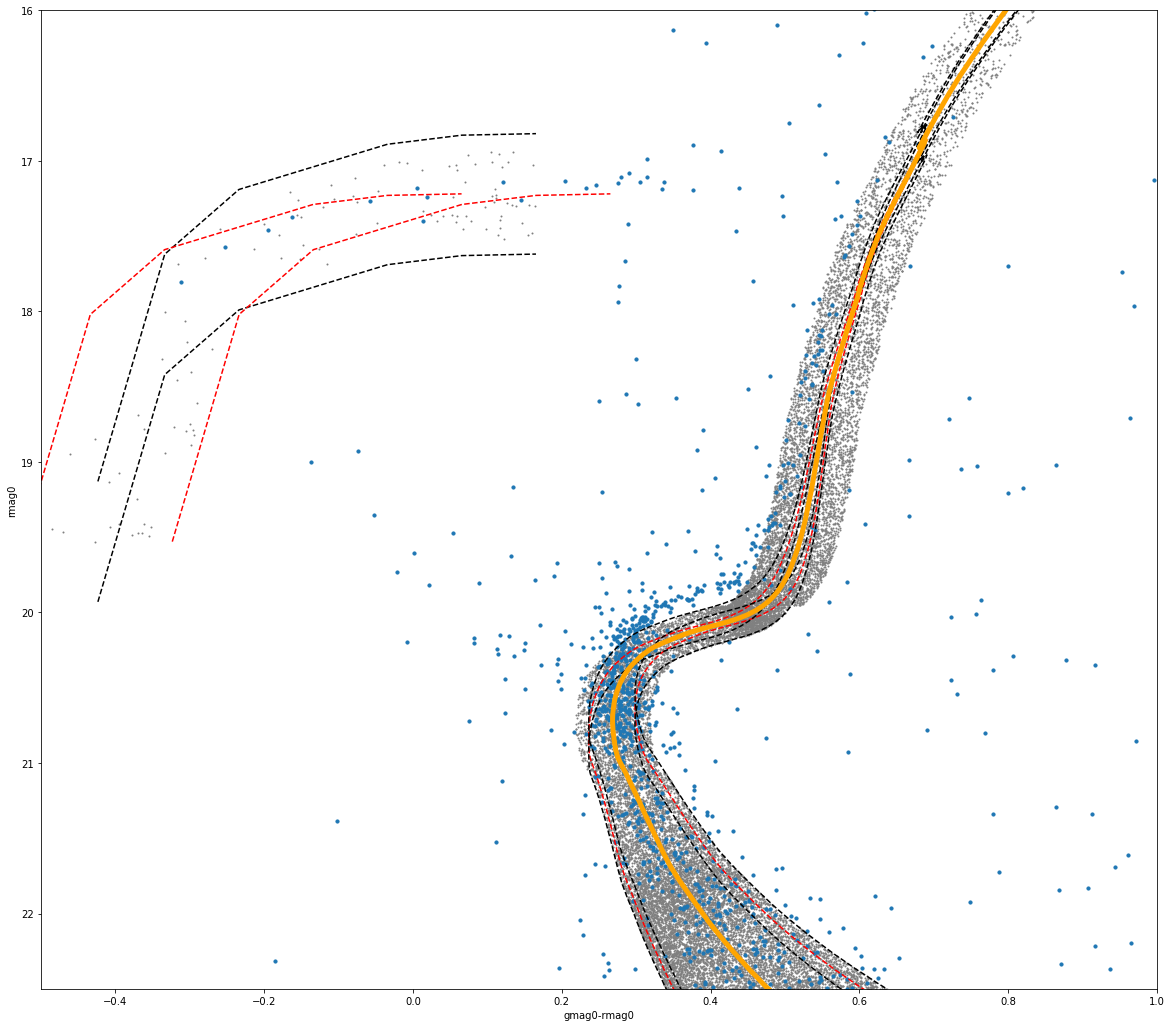

In [18]:
#final plot for the selected smaple isochrone with a 0.1 error
plt.figure(figsize=(20,18))
ind= (dflegacy['dist1']<0.1) & (dflegacy['type'] == 'PSF') 

#plt.scatter(dflegacy['gmag0'][ind]-dflegacy['rmag0'][ind],dflegacy['rmag0'][ind], alpha=0.5,s=1)
#plt.scatter(dflegacy['gmag0'][ind&colorrange]-dflegacy['rmag0'][ind&colorrange],dflegacy['rmag0'][ind&colorrange],s=2)
plt.plot(df2['DECam_g']-df2['DECam_r']-grw, df2['DECam_r']+dm1,'--r')
plt.plot(df2['DECam_g']-df2['DECam_r']+grw, df2['DECam_r']+dm1,'--r')
plt.plot(df2['DECam_g']-df2['DECam_r']+grw, df2['DECam_r']+dm1+0.1,'--k')
plt.plot(df2['DECam_g']-df2['DECam_r']-grw, df2['DECam_r']+dm1-0.1,'--k')
plt.plot(df2['DECam_g']-df2['DECam_r']+grw, df2['DECam_r']+dm1-0.1,'--k')
plt.plot(df2['DECam_g']-df2['DECam_r']-grw, df2['DECam_r']+dm1+0.1,'--k')
plt.plot(df2['DECam_g']-df2['DECam_r'], df2['DECam_r']+dm1,lw=2, color='k',alpha=0.3)
#plt.plot(des_m92_hb_g-des_m92_hb_r, des_m92_hb_r+dm1, lw=2, color='k')
plt.plot(des_m92_hb_g-des_m92_hb_r, des_m92_hb_r+dm1-0.4,'--k')
plt.plot(des_m92_hb_g-des_m92_hb_r, des_m92_hb_r+dm1+0.4,'--k')
plt.plot(des_m92_hb_g-des_m92_hb_r-0.1, des_m92_hb_r+dm1,'--r')
plt.plot(des_m92_hb_g-des_m92_hb_r+0.1, des_m92_hb_r+dm1,'--r')

#ind= (dflegacy['dist1']<0.1)&  (dflegacy['type'] == 'PSF')
plt.plot(df2['DECam_g']-df2['DECam_r'], df2['DECam_r']+dm1,lw=5,color='orange')
plt.scatter(finald['gmag0']-finald['rmag0'],finald['rmag0'],alpha=1,c='grey',s=1)
plt.scatter(dflegacy['gmag0'][ind]-dflegacy['rmag0'][ind],dflegacy['rmag0'][ind],s=10)
plt.ylabel('rmag0')
plt.xlabel('gmag0-rmag0') 

plt.ylim(22.5, 16)
plt.xlim(-0.5,1)
plt.show()

In [ ]:
#adding mag limit and plotting the ra dec for the sample
from matplotlib.collections import PathCollection
from matplotlib.legend_handler import HandlerPathCollection, HandlerLine2D
def update(handle, orig):
    handle.update_from(orig)
    handle.set_alpha(1)
plt.figure(figsize=(8, 6), dpi=80)
ind= ((dflegacy['dist2']<2.) & (dflegacy['type'] == 'PSF')  & (dflegacy['mag_r']<23) & (dflegacy['mag_r']>16))
line,=plt.plot(dflegacy['ra'][ind],dflegacy['dec'][ind],'.',alpha=0.008,c='k',label='original data')
line2,=plt.plot(dflegacy['ra'][ind&colorrange],dflegacy['dec'][ind&colorrange],'.',c='r',alpha=0.05,label='selected targets')

plt.ylabel('dec')
plt.xlabel('ra')
plt.legend(handler_map={PathCollection : HandlerPathCollection(update_func= update),
                        plt.Line2D : HandlerLine2D(update_func = update)})




In [ ]:
df=pd.DataFrame()


In [ ]:
df['RA']=dflegacy['ra'][ind&colorrange]
df['DEC']=dflegacy['dec'][ind&colorrange]
df['rmag']=dflegacy['mag_r'][ind&colorrange]
df['gaia_id']= dflegacy['ref_id'][ind&colorrange]


In [ ]:
df

#sample output
from astropy.table import Table
t = Table.from_pandas(df)
t.write('r22.5_radec_20717_id.fits')


# gaia match (parallax/proper motion cut)

In [ ]:
gaia_match = pd.read_csv('/Users/Jenny/projects/desi_pal5/pal_fiberassign/gaia_match_8827.csv')




In [ ]:
cslope=(2.5-0.)/(231-228)

cint=0.-cslope*228

cutline=cslope*gaia_match['ra']+cint


In [ ]:
#testing proper motion selection


In [ ]:

a,b,c=plt.hist(gaia_match['pmra'][gaia_match['dec']< cutline],bins=1000,range=[-100,100])
plt.xlim(-50,50)



In [ ]:
gaia_match


In [ ]:
gaia_match['pri']=range(0,len(gaia_match),1)


In [ ]:
#parallax cut and proper motion cut 


In [ ]:
gaia_match['pri'][(gaia_match['parallax'] - gaia_match['parallax_error']*3) < 0.2]=1000



In [ ]:
gaia_match['pri'][((gaia_match['parallax'] - gaia_match['parallax_error']*3) < 0.2)&((((gaia_match['pmra']-(-2.5))*(gaia_match['pmra']-(-2.5))+(gaia_match['pmdec']-(-2.5))*(gaia_match['pmdec']-(-2.5))) < (2+2.5*np.sqrt(gaia_match['pmra_error']*gaia_match['pmra_error']+gaia_match['pmdec_error']*gaia_match['pmdec_error']))*(2+2.5*np.sqrt(gaia_match['pmra_error']*gaia_match['pmra_error']+gaia_match['pmdec_error']*gaia_match['pmdec_error']))) )]=5000





In [ ]:
gaia_match['pri'][(gaia_match['pri']!=5000) & (gaia_match['pri']!=1000) ]=0



In [ ]:
finald= dflegacy[ind&colorrange]


In [ ]:
#cross match pick up the parallax + pm cut in the original catalog

import astropy.units as u

pri=5000
gaia_c = gaia_match


c = SkyCoord(ra=gaia_c['ra'].values*u.degree, dec=gaia_c['dec'].values*u.degree)
catalog = SkyCoord(ra=finald['ra'].values*u.degree, dec=finald['dec'].values*u.degree)



#idx, d2d, d3d = c.match_to_catalog_sky(catalog)
max_sep = 2.0 * u.arcsec
idx, d2d, d3d = c.match_to_catalog_3d(catalog)
sep_constraint = d2d < max_sep
c_matches = c[sep_constraint]
catalog_matches = catalog[idx[sep_constraint]]



In [ ]:
finald[(~np.isin(range(0,len(finald),1),idx[sep_constraint]))]


In [ ]:
#the catalog that do not have the gaia match
out1sample = dflegacy[ind&colorrange][(~np.isin(range(0,len(dflegacy[ind&colorrange]),1),idx[sep_constraint]))]





In [ ]:
out1sample


In [ ]:
out1sample['pri']=3000


In [ ]:
#Final file for the priority file
ind=pd.DataFrame()
ind['pri'] = np.append(gaia_c['pri'][((gaia_c['pri']==5000)|(gaia_c['pri']==1000))],out1sample['pri'])



In [ ]:
ind


In [ ]:
ind.to_csv('priority_pppmcut_19092.csv',index=False)


In [ ]:
#sample output (combining the priority 5000/3000 sample with gaia unmatched sample)
from astropy.table import Table
#test_df=pd.read_csv('/Users/Jenny/projects/desi_pal5/pal_fiberassign/gaia_match_with_colorpppmcut_24352.csv')
tdf=pd.DataFrame()
tdf['RA'] = np.append(gaia_c['ra'][((gaia_c['pri']==5000)|(gaia_c['pri']==1000))],out1sample['ra'])
tdf['DEC'] = np.append(gaia_c['dec'][((gaia_c['pri']==5000)|(gaia_c['pri']==1000))],out1sample['dec'])
t = Table.from_pandas(tdf)

t.write('r22.5_radec_pppmcut_19092_new.fits')

